## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [8]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [9]:
## Merge the datasets

mouse_study = pd.merge(mouse_metadata, study_results, how = "right", on="Mouse ID")
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [11]:
#Finding the duplicate mouse 
dup = mouse_study.loc[mouse_study.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup

array(['g989'], dtype=object)

In [12]:
mouse_study.loc[mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_study[mouse_study["Mouse ID"].isin(dup)==False]
len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [15]:
means = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stds = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sems = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
drug_df = pd.DataFrame({"Mean": means, "Median": medians, "Variance": variances, "Std": stds, "SEM": sems})
drug_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#   and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_df2 = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :["mean", "median", "var", "std", "sem"]})
drug_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

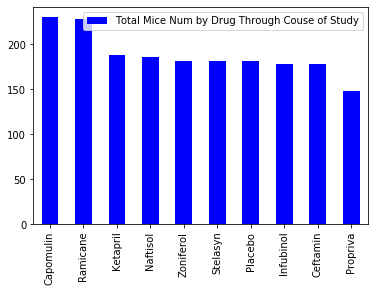

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
data = clean_df['Drug Regimen'].value_counts()
pandas_bar = pd.DataFrame(data)
pandas_bar.columns = ["Total Mice Num by Drug Through Couse of Study"]
pandas_bar = pandas_bar.plot.bar(color='blue')


In [18]:
data.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

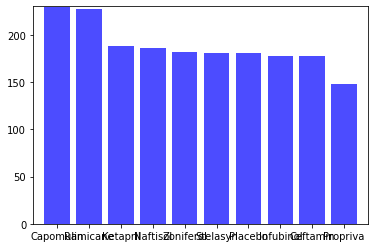

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x=data.index, height=data.values, color = "blue", alpha = 0.7)
x_axis = np.arange(len(data))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, data.index)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data)+0.5)
plt.show()

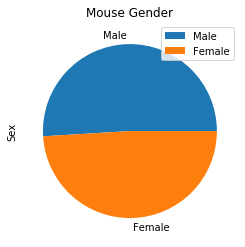

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_df["Sex"].value_counts()
pandas_pie = pd.DataFrame(gender_groups)
pandas_pie = pandas_pie.plot.pie(y='Sex', title="Mouse Gender")


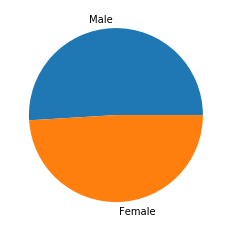

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
plt.pie(gender_groups, labels=labels)

plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Start by getting the last (greatest) timepoint for each mouse
# Using reset_index will return the series as a dataframe
max_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = clean_df.merge(max_df, on=['Mouse ID', 'Timepoint'])

In [24]:
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for  treatment in treatments:
    new_df = clean_df.loc[clean_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quantiles = new_df.quantile([0.25, 0.5, 0.75])
    lower = quantiles[0.25]
    uper = quantiles[0.75]
    IQR = uper - lower
    lower_bound = lower - 1.5 * IQR
    uper_bound = uper + 1.5 * IQR
    print(f"outlier for {treatment}: {new_df.loc[(new_df<lower_bound)|(new_df > uper_bound)]}") 
    tumor_volume_data.append(new_df)

outlier for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
outlier for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
outlier for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
outlier for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


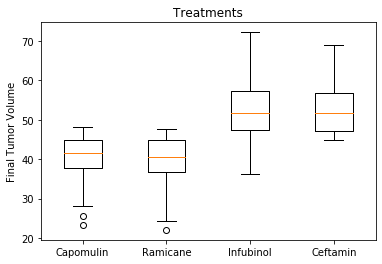

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax1 = plt.subplots()
ax1.set_title("Treatments")
ax1.set_ylabel("Final Tumor Volume")
ax1.boxplot(tumor_volume_data, labels=treatments)
plt.show()

## Line and Scatter Plots

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
filtered_df = cap_df.loc[cap_df['Mouse ID'] == 's185']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


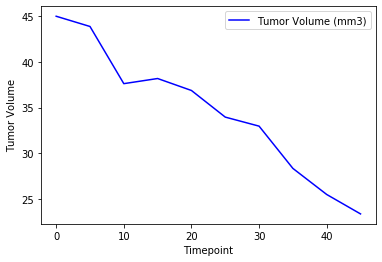

In [45]:
filtered_df.plot('Timepoint', 'Tumor Volume (mm3)', color = 'blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

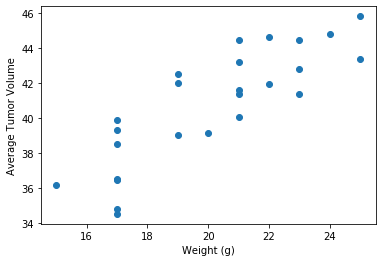

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_weight = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(mean_weight["Weight (g)"], mean_weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = mean_weight.corr(method="pearson")
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {correlation}.')

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is                     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Age_months            1.000000   -0.074396  -0.352502            0.015190   
Weight (g)           -0.074396    1.000000  -0.256449            0.841936   
Timepoint            -0.352502   -0.256449   1.000000           -0.116552   
Tumor Volume (mm3)    0.015190    0.841936  -0.116552            1.000000   
Metastatic Sites     -0.074090   -0.218440   0.443939           -0.099062   

                    Metastatic Sites  
Age_months                 -0.074090  
Weight (g)                 -0.218440  
Timepoint                   0.443939  
Tumor Volume (mm3)         -0.099062  
Metastatic Sites            1.000000  .
